##### Initiliaze Core Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ***Data Loading and Exploration***

## Loading 4 files

In [2]:
transactions_df = pd.read_csv('/Users/umut/Desktop/datasets/transactions.csv')
transactions_df['purchase_date'] = pd.to_datetime(transactions_df['purchase_date'])
transactions_df

,customer_id,product_id,purchase_date,quantity
0,38769,3477,2020-06-01,1
1,42535,30474,2020-06-01,1
2,42535,15833,2020-06-01,1
3,42535,20131,2020-06-01,1
4,42535,4325,2020-06-01,1
...,...,...,...,...
1071533,22114,29567,2021-01-31,2
1071534,22114,21068,2021-01-31,1
1071535,10900,18270,2021-01-31,1
1071536,17894,31265,2021-01-31,5


In [3]:
catalog_df = pd.read_csv('product_catalog.csv')
catalog_df

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]
...,...,...,...,...,...,...,...,...
32771,12036,1383,10,0,503,0,101,"[3502, 1088, 2004, 691, 3422, 2308, 308, 3688,..."
32772,22709,567,4,2,491,3,66,"[3900, 3905, 3903, 3910, 1807, 274, 1467, 914]"
32773,32322,1385,10,1,500,0,37,"[2686, 2609, 725]"
32774,19118,1113,6,2,491,0,117,"[3900, 3910, 3903, 2473, 914, 274]"


In [4]:
category_map_df = pd.read_csv('product_category_map.csv')
category_map_df

,category_id,parent_category_id
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623
...,...,...
4327,4295,3898
4328,4296,3898
4329,4297,3898
4330,4298,3898


In [5]:
test_df = pd.read_csv('test.csv')
test_df

,id,customer_id,product_id,prediction
0,0,0,20664,NaN
1,1,0,28231,NaN
2,2,13,2690,NaN
3,3,15,1299,NaN
4,4,15,20968,NaN
...,...,...,...,...
9995,9995,46118,20106,NaN
9996,9996,46124,19677,NaN
9997,9997,46125,12878,NaN
9998,9998,46127,7963,NaN


## Transactions Exploration

In [6]:
transactions_df['year'] = transactions_df['purchase_date'].dt.year
transactions_df['month'] = transactions_df['purchase_date'].dt.month
transactions_df['day_of_week'] = transactions_df['purchase_date'].dt.dayofweek
transactions_df

,customer_id,product_id,purchase_date,quantity,year,month,day_of_week
0,38769,3477,2020-06-01,1,2020,6,0
1,42535,30474,2020-06-01,1,2020,6,0
2,42535,15833,2020-06-01,1,2020,6,0
3,42535,20131,2020-06-01,1,2020,6,0
4,42535,4325,2020-06-01,1,2020,6,0
...,...,...,...,...,...,...,...
1071533,22114,29567,2021-01-31,2,2021,1,6
1071534,22114,21068,2021-01-31,1,2021,1,6
1071535,10900,18270,2021-01-31,1,2021,1,6
1071536,17894,31265,2021-01-31,5,2021,1,6


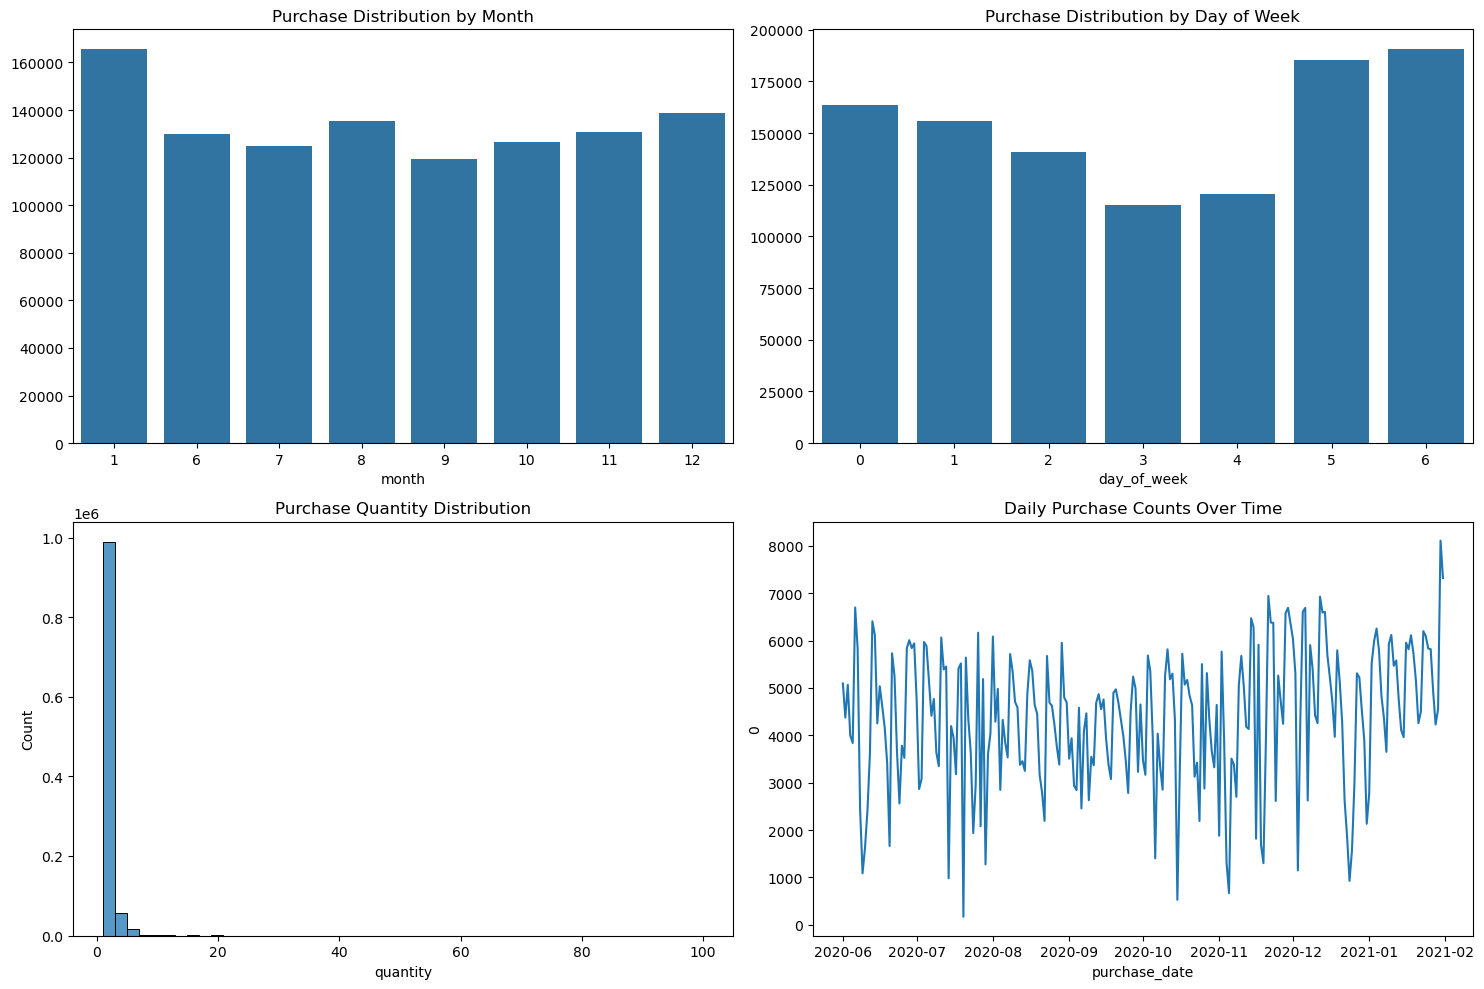

In [7]:
# Plot purchase distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Monthly distribution
monthly_sales = transactions_df.groupby('month').size()
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, ax=axes[0,0])
axes[0,0].set_title('Purchase Distribution by Month')

# Daily distribution
daily_sales = transactions_df.groupby('day_of_week').size()
sns.barplot(x=daily_sales.index, y=daily_sales.values, ax=axes[0,1])
axes[0,1].set_title('Purchase Distribution by Day of Week')

# Purchase quantity distribution
sns.histplot(data=transactions_df, x='quantity', bins=50, ax=axes[1,0])
axes[1,0].set_title('Purchase Quantity Distribution')

# Time series of daily purchases
daily_counts = transactions_df.groupby('purchase_date').size().reset_index()
sns.lineplot(data=daily_counts, x='purchase_date', y=0, ax=axes[1,1])
axes[1,1].set_title('Daily Purchase Counts Over Time')

plt.tight_layout()
plt.show()

In [8]:
customer_freq = transactions_df.groupby('customer_id').size().reset_index(name='purchase_count')
customer_basket = transactions_df.groupby('customer_id')['quantity'].mean().reset_index(name='avg_basket_size')

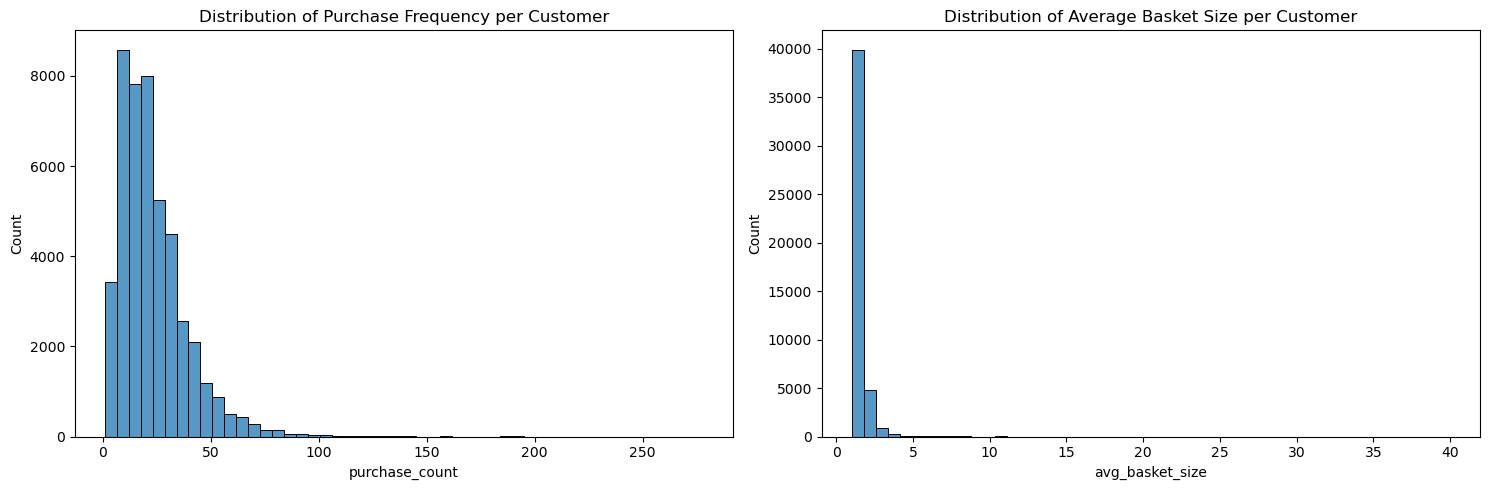

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=customer_freq, x='purchase_count', bins=50, ax=ax1)
ax1.set_title('Distribution of Purchase Frequency per Customer')

sns.histplot(data=customer_basket, x='avg_basket_size', bins=50, ax=ax2)
ax2.set_title('Distribution of Average Basket Size per Customer')

plt.tight_layout()
plt.show()

In [10]:
product_freq = transactions_df.groupby('product_id').size().reset_index(name='purchase_count')

product_intervals = transactions_df.groupby('product_id')['purchase_date'].agg(['min', 'max', 'count'])
product_intervals['date_range'] = (product_intervals['max'] - product_intervals['min']).dt.days
product_intervals['purchases_per_day'] = product_intervals['count'] / product_intervals['date_range']

In [11]:
product_intervals[(product_intervals['count'] > 1) | (product_intervals['date_range'] > 0)]

,min,max,count,date_range,purchases_per_day
product_id,,,,,
1,2020-06-30,2021-01-19,9,203,0.044335
3,2020-07-01,2020-12-10,4,162,0.024691
4,2020-06-23,2020-12-06,5,166,0.030120
5,2020-06-25,2020-09-29,2,96,0.020833
6,2020-06-01,2021-01-31,98,244,0.401639
...,...,...,...,...,...
32768,2020-06-03,2021-01-30,53,241,0.219917
32769,2020-06-02,2021-01-28,51,240,0.212500
32770,2020-07-01,2021-01-25,6,208,0.028846


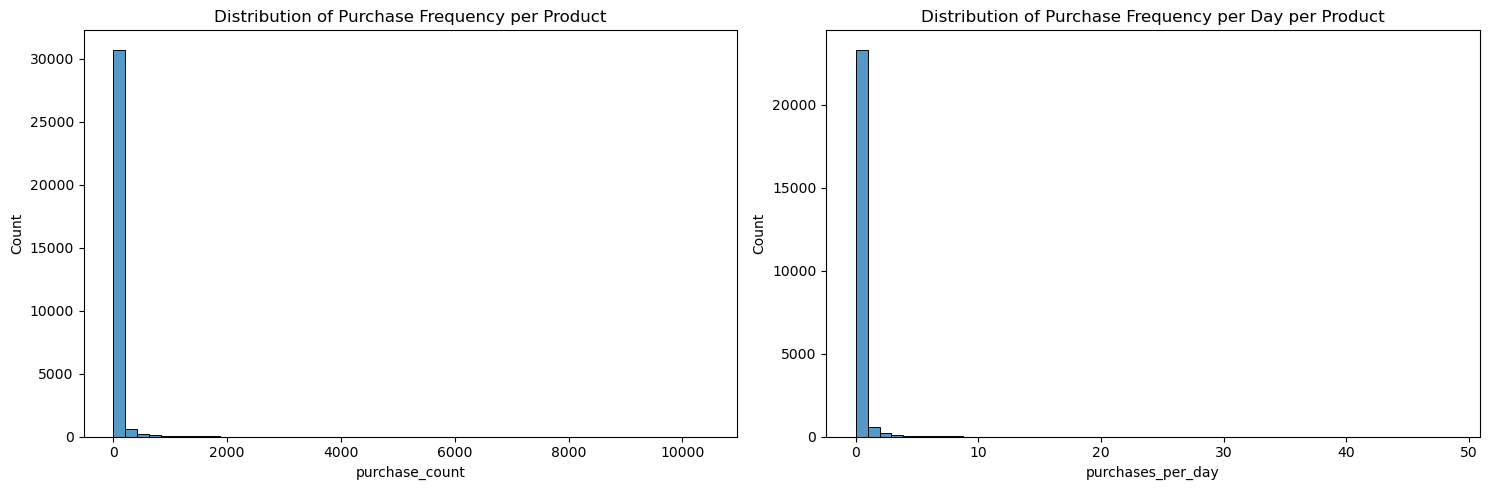

In [12]:
# Plot distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=product_freq, x='purchase_count', bins=50, ax=ax1)
ax1.set_title('Distribution of Purchase Frequency per Product')

sns.histplot(data=product_intervals, x='purchases_per_day', bins=50, ax=ax2)
ax2.set_title('Distribution of Purchase Frequency per Day per Product')

plt.tight_layout()
plt.show()

## Catalog Exploration

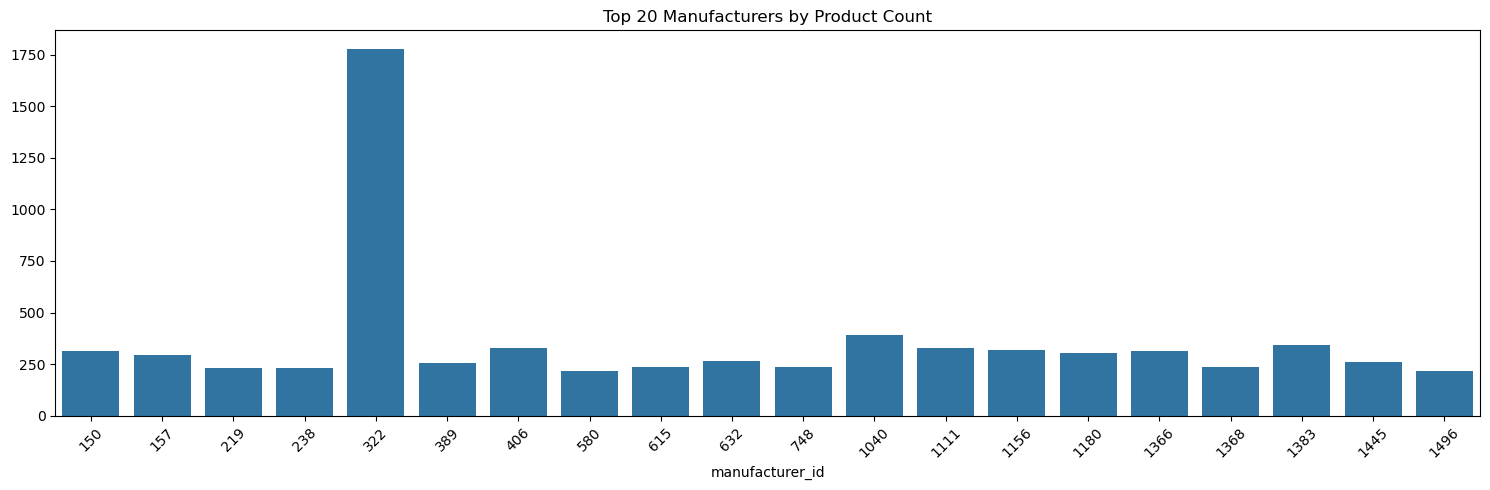

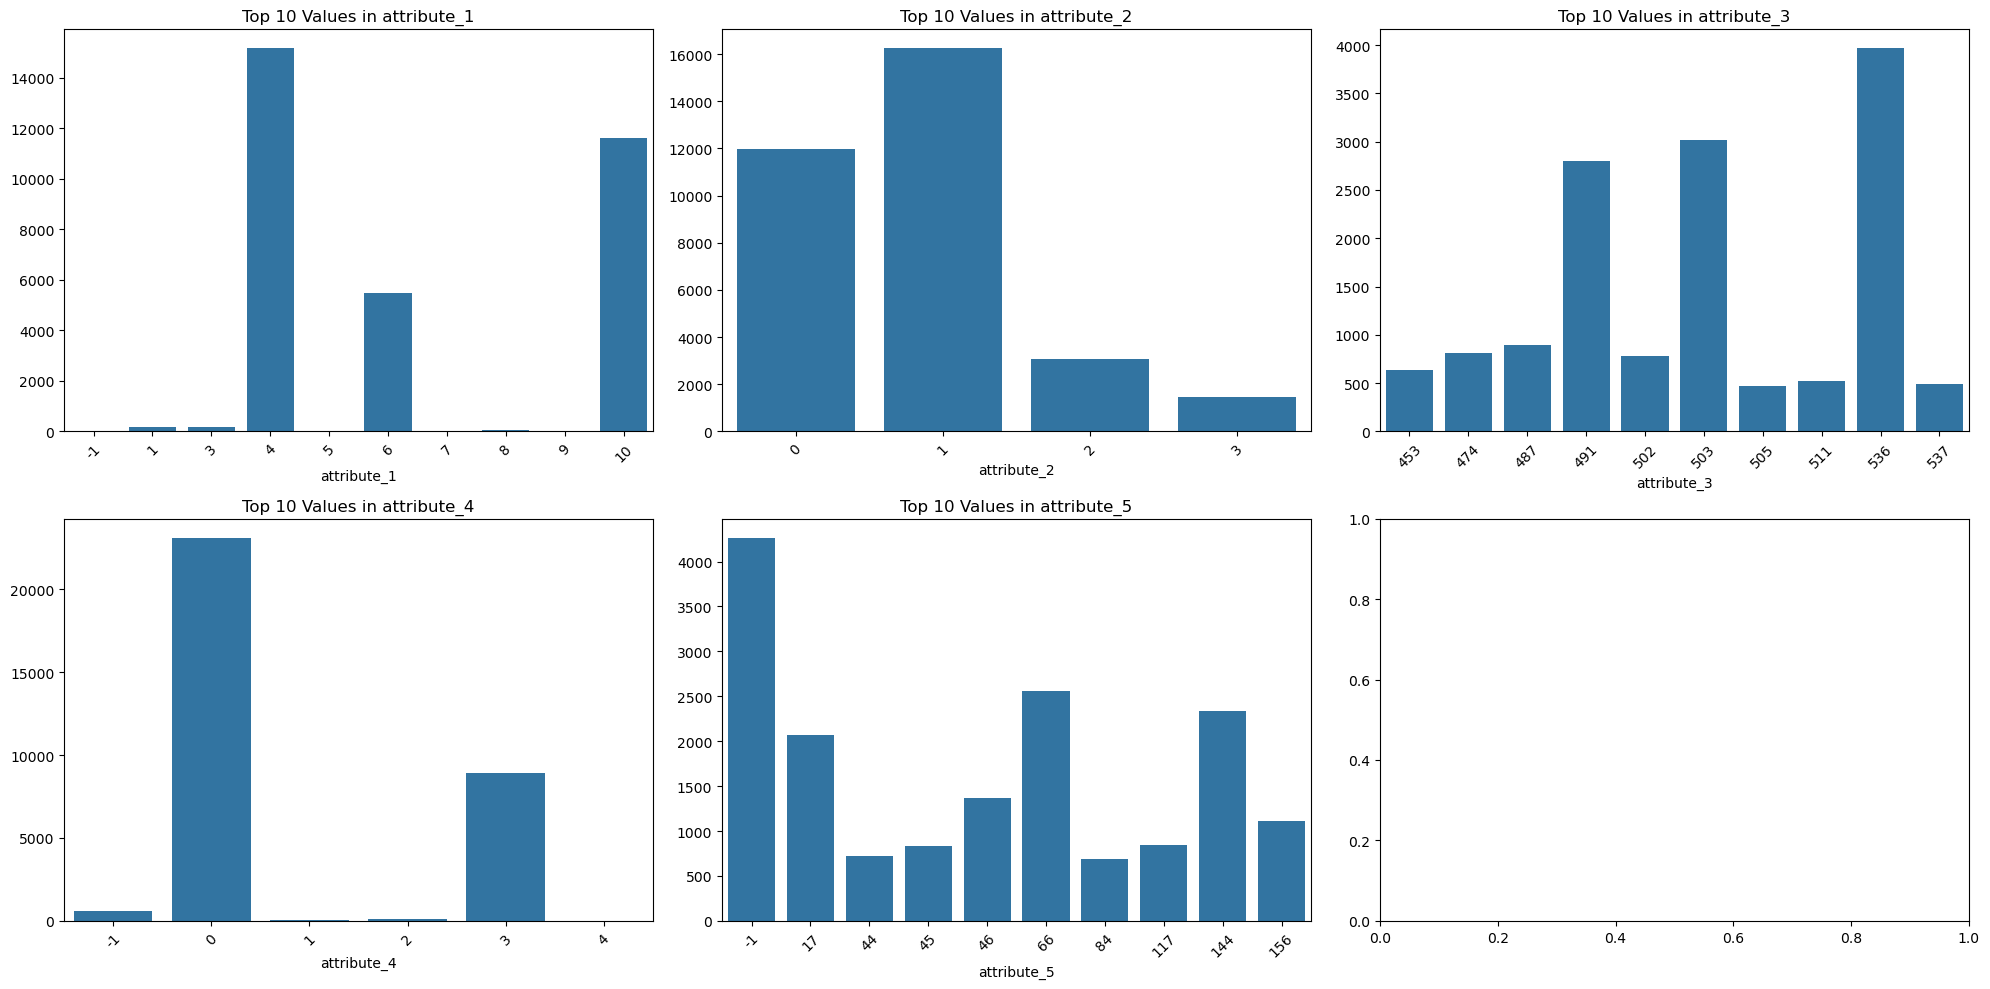

In [13]:
plt.figure(figsize=(15, 5))
manufacturer_dist = catalog_df['manufacturer_id'].value_counts()
sns.barplot(x=manufacturer_dist.index[:20], y=manufacturer_dist.values[:20])
plt.title('Top 20 Manufacturers by Product Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(['attribute_1', 'attribute_2', 'attribute_3',
                         'attribute_4', 'attribute_5']):
    value_counts = catalog_df[col].value_counts()
    sns.barplot(x=value_counts.index[:10], y=value_counts.values[:10], ax=axes[i])
    axes[i].set_title(f'Top 10 Values in {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

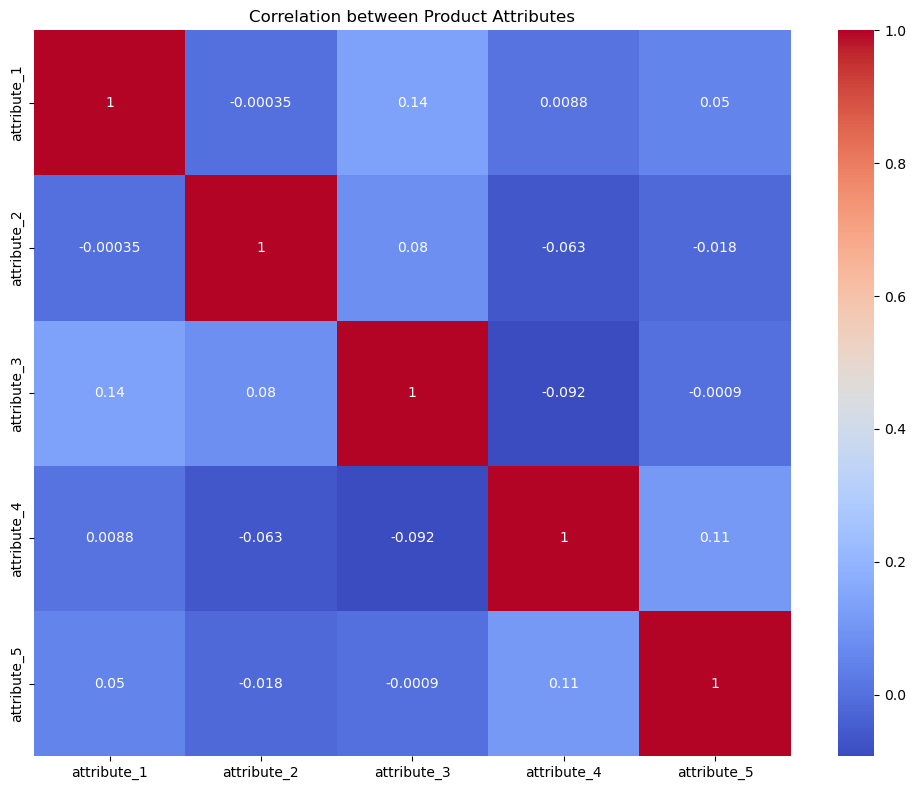

In [14]:
correlation = catalog_df[['attribute_1', 'attribute_2', 'attribute_3',
                  'attribute_4', 'attribute_5']].astype('category').apply(lambda x: x.cat.codes)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Product Attributes')
plt.tight_layout()
plt.show()


## Product Catalog Map Exploration

In [15]:
G = nx.from_pandas_edgelist(category_map_df.dropna(),
                            source='parent_category_id',
                            target='category_id',
                            create_using=nx.DiGraph)

G.number_of_nodes()

4300

In [16]:
G_dag = nx.DiGraph([(u, v) for u, v in nx.edges(G) if not nx.has_path(G, v, u)])

In [17]:
if nx.is_directed_acyclic_graph(G_dag):
    print("Graph is now a DAG.")
else:
    print("Graph still contains cycles.")


Graph is now a DAG.


In [18]:
roots = [n for n in G_dag.nodes() if G_dag.in_degree(n) == 0]
depths = {node: depth for root in roots for node, depth in nx.single_source_shortest_path_length(G_dag, root).items()}

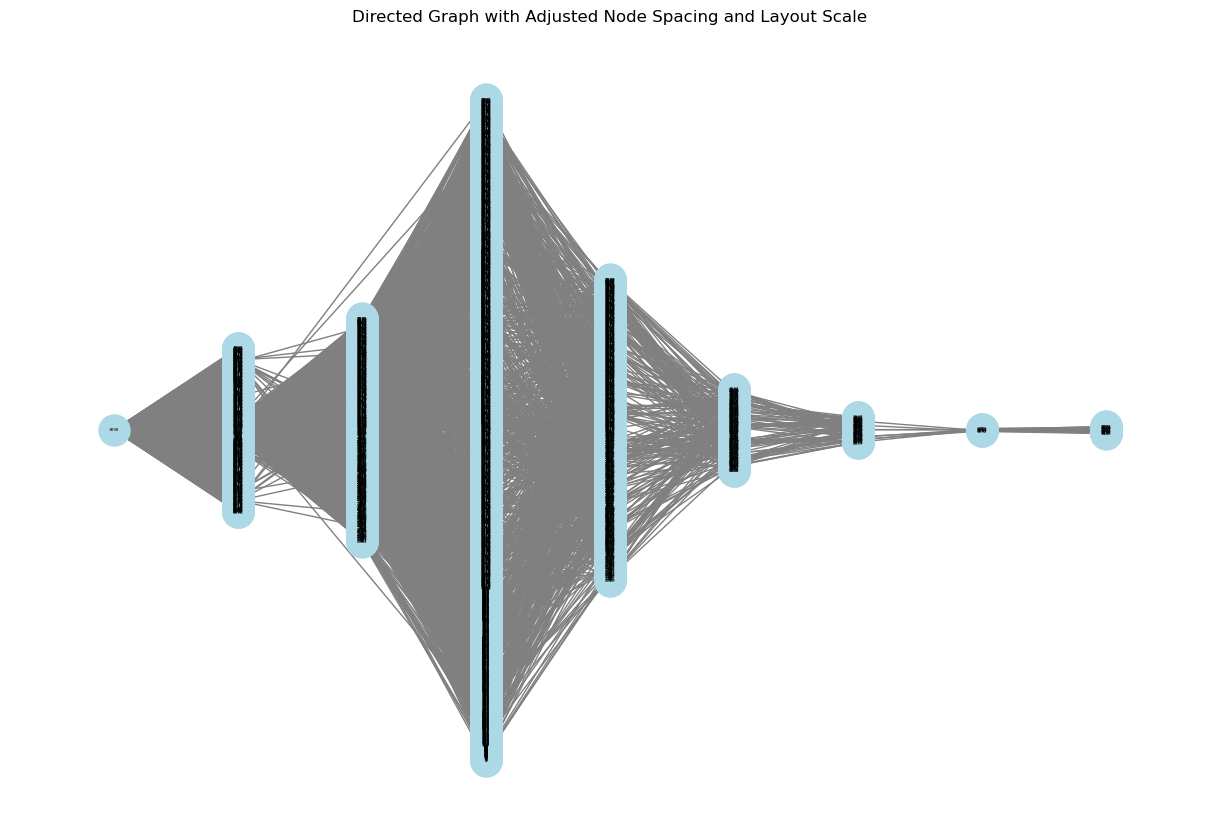

In [19]:
levels = {}
level = 0

for node in nx.topological_sort(G_dag):
    if node not in levels:
        levels[node] = level

    for successor in G_dag.successors(node):
        levels[successor] = levels[node] + 1

for node, subset in levels.items():
    G_dag.nodes[node]['subset'] = subset

pos = nx.multipartite_layout(G_dag, subset_key="subset", scale=5)
plt.figure(figsize=(12, 8))
nx.draw(
    G_dag, pos,
    with_labels=True,
    node_color='lightblue',
    node_size=500,
    arrowsize=0.5,
    font_size=3,
    arrowstyle='-|>',
    edge_color='gray'
)

plt.title("Directed Graph with Adjusted Node Spacing and Layout Scale")
plt.show()

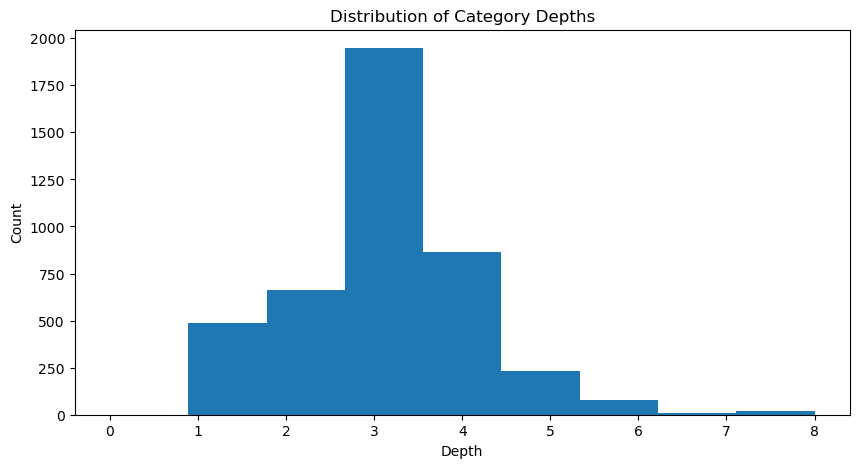

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(list(depths.values()), bins=max(depths.values()) + 1)
plt.title('Distribution of Category Depths')
plt.xlabel('Depth')
plt.ylabel('Count')
plt.show()

## Customer-Product Relationship Analysis:

In [21]:
# Customer purchase diversity
customer_diversity = transactions_df.groupby('customer_id')['product_id'].nunique().reset_index(name='unique_products')

# Product purchase breadth
product_breadth = transactions_df.groupby('product_id')['customer_id'].nunique().reset_index(name='unique_customers')

# Repeat purchase analysis
customer_product_freq = transactions_df.groupby(['customer_id', 'product_id']).size().reset_index(name='purchase_count')

In [22]:
def calculate_repurchase_intervals(df):
    df = df.sort_values(by=['customer_id', 'product_id', 'purchase_date'])
    df['prev_date'] = df.groupby(['customer_id', 'product_id'])['purchase_date'].shift(1)
    df['interval'] = (df['purchase_date'] - df['prev_date']).dt.days
    stats = df.groupby(['customer_id', 'product_id'])['interval'].agg(
        avg_interval='mean',
        std_interval='std'
    ).reset_index()
    return stats

repurchase_intervals = calculate_repurchase_intervals(transactions_df)
repurchase_intervals

,customer_id,product_id,avg_interval,std_interval
0,0,1505,NaN,NaN
1,0,6446,35.0,NaN
2,0,9325,NaN,NaN
3,0,12468,NaN,NaN
4,0,12505,NaN,NaN
...,...,...,...,...
896421,46137,22403,NaN,NaN
896422,46137,22583,NaN,NaN
896423,46137,28343,NaN,NaN
896424,46137,28900,NaN,NaN


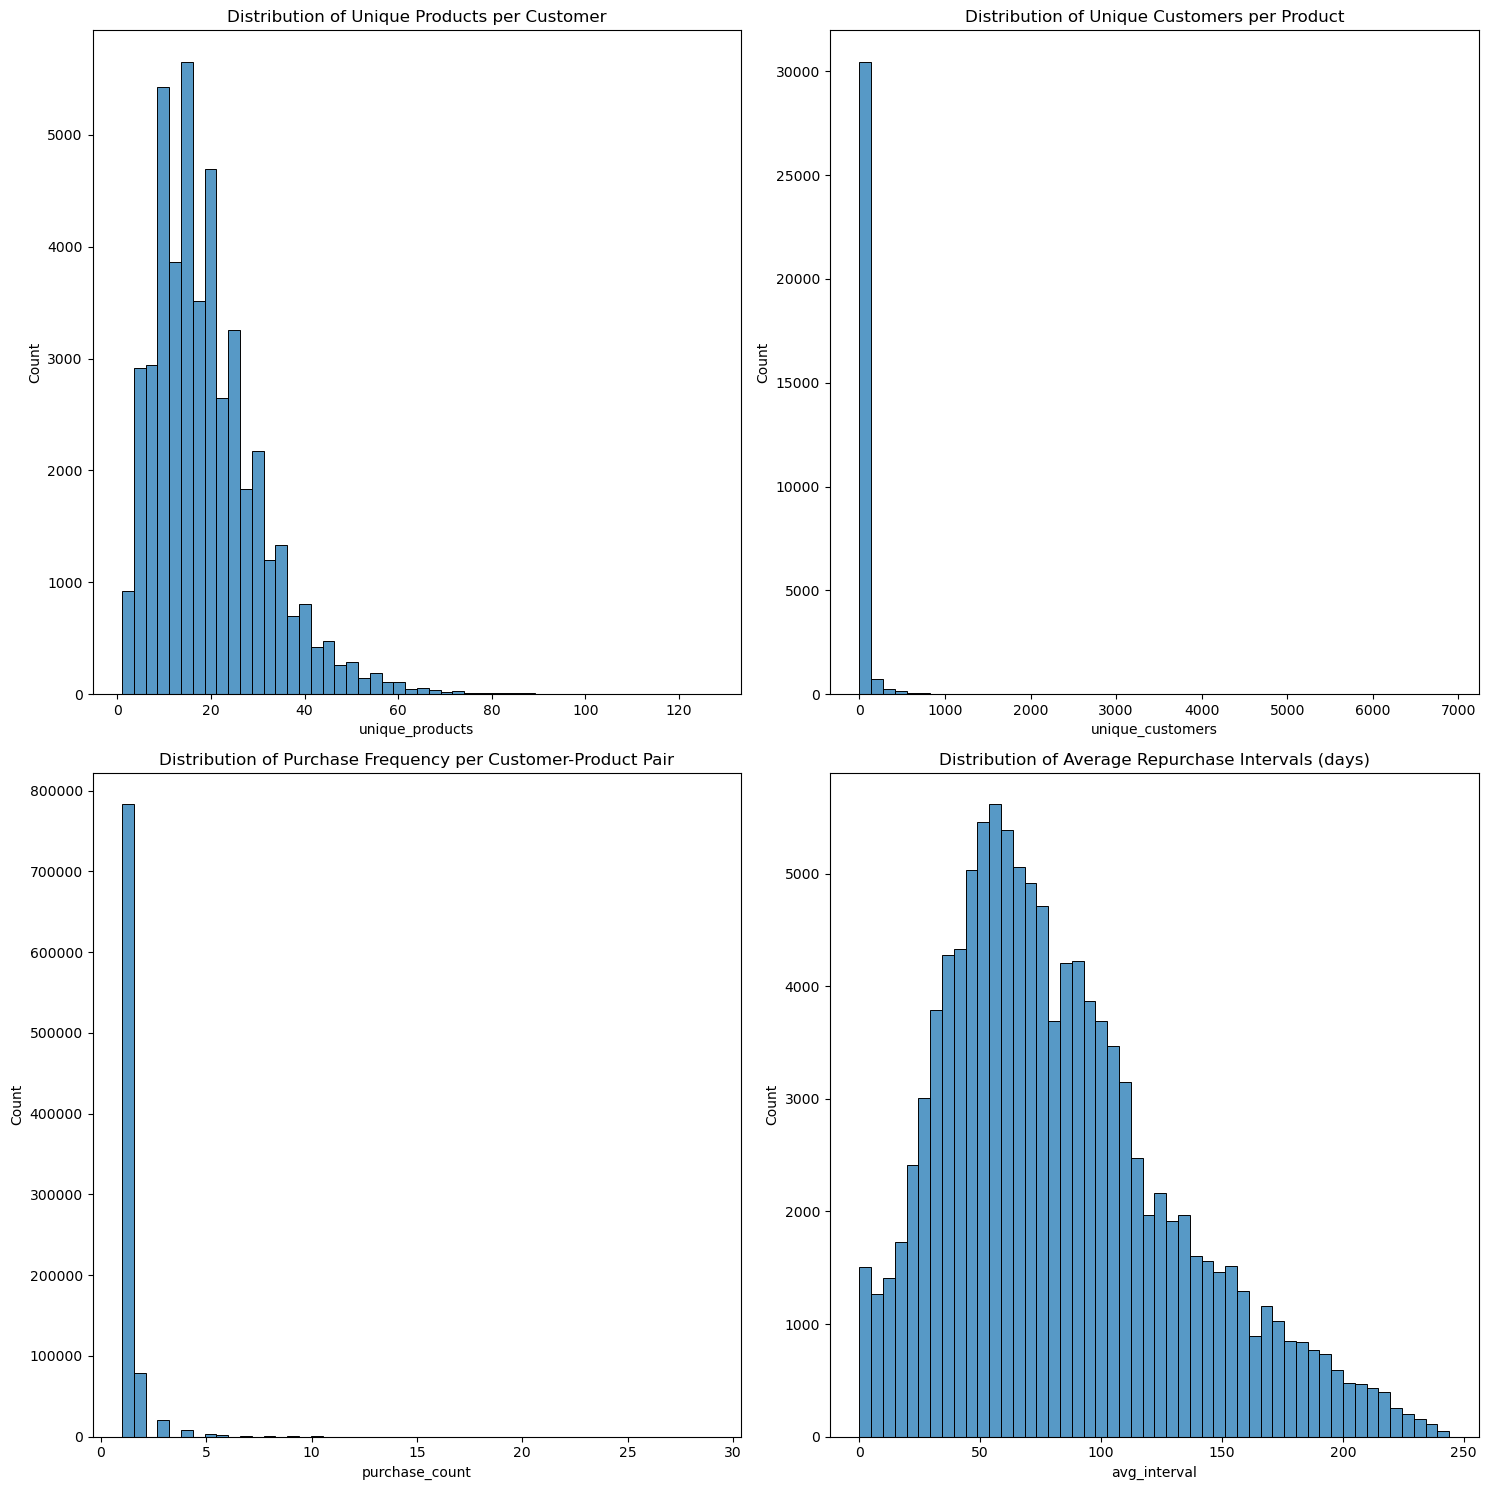

In [23]:
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.histplot(data=customer_diversity, x='unique_products', bins=50, ax=axes[0,0])
axes[0,0].set_title('Distribution of Unique Products per Customer')

sns.histplot(data=product_breadth, x='unique_customers', bins=50, ax=axes[0,1])
axes[0,1].set_title('Distribution of Unique Customers per Product')

sns.histplot(data=customer_product_freq, x='purchase_count', bins=50, ax=axes[1,0])
axes[1,0].set_title('Distribution of Purchase Frequency per Customer-Product Pair')

sns.histplot(data=repurchase_intervals, x='avg_interval', bins=50, ax=axes[1,1])
axes[1,1].set_title('Distribution of Average Repurchase Intervals (days)')

plt.tight_layout()
plt.show()

# ***Impute & Applications***


## Feature Engineering by Using Attributes

### K Means Application to Attributes


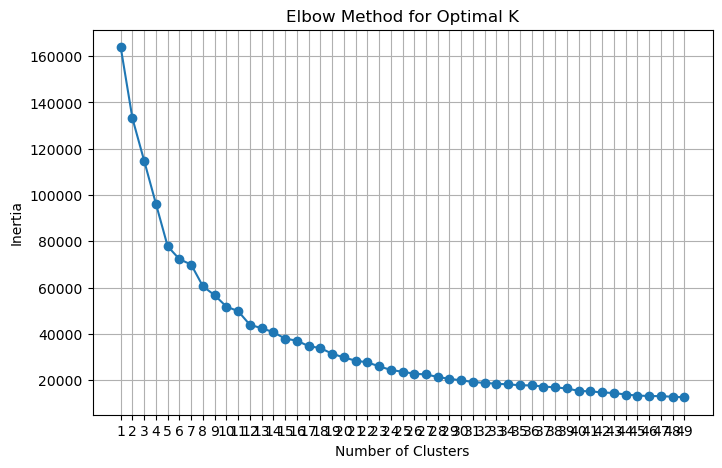

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select attributes for clustering
attributes = catalog_df[['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5']]

# Standardize the data for better clustering performance
scaler = StandardScaler()
X_train = scaler.fit_transform(attributes)

# Use Elbow method to find optimal number of clusters
inertia = []
cluster_range = range(1, 50)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


In [25]:
# Apply K-Means (k = 5)
kmeans = KMeans(n_clusters=7, random_state=42)
catalog_df['knn_cluster'] = kmeans.fit_predict(X_train)

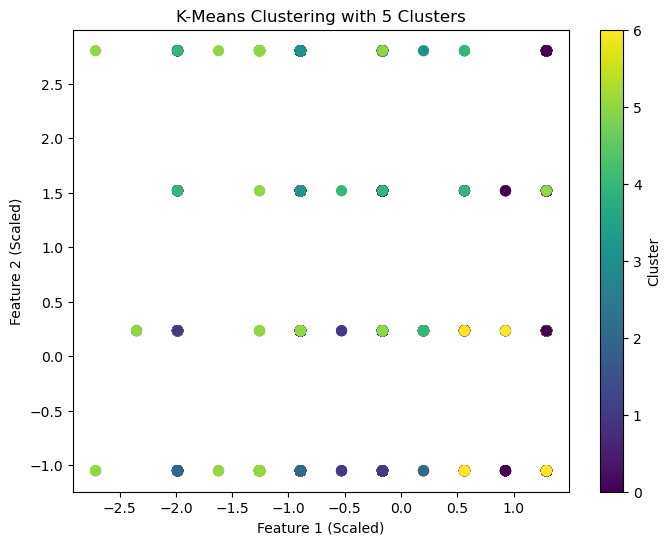

In [26]:
# Kümeleme sonuçlarını görselleştirmek için (isteğe bağlı)
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=catalog_df['knn_cluster'], cmap='viridis', s=50)
plt.title("K-Means Clustering with 5 Clusters")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.colorbar(label="Cluster")
plt.show()

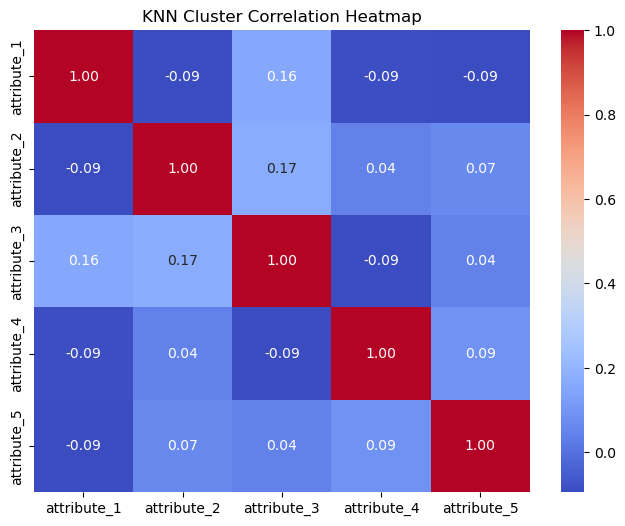

In [27]:
import seaborn as sns

# Her küme için özelliklerin ortalama değerlerini al
knn_cluster_means = catalog_df.groupby('knn_cluster')[['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5']].mean()

# Korelasyon matrisini hesapla
correlation_matrix = knn_cluster_means.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("KNN Cluster Correlation Heatmap")
plt.show()


### MERGE DATA PROCESS (TAKE CONSIDER!)

In [28]:
transactions_df

,customer_id,product_id,purchase_date,quantity,year,month,day_of_week
0,38769,3477,2020-06-01,1,2020,6,0
1,42535,30474,2020-06-01,1,2020,6,0
2,42535,15833,2020-06-01,1,2020,6,0
3,42535,20131,2020-06-01,1,2020,6,0
4,42535,4325,2020-06-01,1,2020,6,0
...,...,...,...,...,...,...,...
1071533,22114,29567,2021-01-31,2,2021,1,6
1071534,22114,21068,2021-01-31,1,2021,1,6
1071535,10900,18270,2021-01-31,1,2021,1,6
1071536,17894,31265,2021-01-31,5,2021,1,6


In [29]:
# catalog-transaction connection (by product_id)
knn_merged_data = transactions_df.merge(catalog_df[['product_id', 'knn_cluster']], on='product_id', how='left')

# calculate purchase frequency per cluster
knn_merged_data['purchase_date'] = pd.to_datetime(knn_merged_data['purchase_date'])

#knn_merged_data.drop_duplicates(subset=['purchase_date', 'KNN_cluster'], inplace=True)
knn_merged_data.to_csv('knn_merged_data.csv', index=False)

In [30]:
import math

knn_merged_data['week_diff'] = knn_merged_data.groupby('KNN_cluster')['purchase_date'].diff().dt.days / 7

# calculate average week difference per cluster
knn_merged_data['avg_week_diff'] = knn_merged_data.groupby('KNN_cluster')['week_diff'].transform('mean')
knn_merged_data['avg_week_diff'] = knn_merged_data['avg_week_diff'].apply(lambda x: math.ceil(x) if x <= 4.5 else 0)

KeyError: 'KNN_cluster'

In [664]:
knn_test = test_df.merge(knn_merged_data, on='product_id', how='left')
# fill missing values with average week difference

knn_test['prediction'] = knn_test['week_diff']
knn_test.drop(columns=['week_diff'],inplace=True)

knn_test.nunique()

id               10000
customer_id_x     7251
product_id        3856
prediction           1
customer_id_y     1994
purchase_date      245
quantity            12
year                 2
month                8
day_of_week          7
KNN_cluster         20
avg_week_diff        1
dtype: int64

In [648]:
import pandas as pd

# Veri setini yükle (Örnek)
transactions = pd.read_csv("transactions_with_clusters.csv")  # Etiketlenmiş transaction dosyan

# purchase_date sütununu datetime formatına çevir
transactions['purchase_date'] = pd.to_datetime(transactions['purchase_date'])

# Cluster bazında gruplama yap
cluster_date_differences = []

for cluster, group in transactions.groupby('cluster'):
    # Her cluster için tarihler arası farkı hesapla
    product_dates = group.groupby('product_id')['purchase_date'].apply(list)
    date_differences = []
    for dates in product_dates:
        # Tarihlerin farkını gün cinsinden al
        dates = sorted(dates)
        differences = [(dates[i] - dates[i - 1]).days for i in range(1, len(dates))]
        date_differences.extend(differences)
    
    # Ortalama gün farkını hesapla
    avg_difference = sum(date_differences) / len(date_differences) if date_differences else 0
    cluster_date_differences.append({'cluster': cluster, 'avg_date_difference': avg_difference})

# Sonuçları bir DataFrame'e çevir
cluster_avg_differences = pd.DataFrame(cluster_date_differences)

# Sonucu kaydetmek için (isteğe bağlı)
#cluster_avg_differences.to_csv("cluster_avg_date_differences.csv", index=False)

# Sonuçları görüntüle
cluster_avg_differences


,cluster,avg_date_difference
0,0,4.959396
1,1,21.505306
2,2,18.743302
3,3,2.412690
4,4,15.775723
5,5,2.595149
6,6,10.872485
7,7,3.457426
8,8,3.180332
9,9,2.846103


In [650]:
# Cluster ortalama farklarını transaction dosyasına ekle
transactions = transactions.merge(cluster_avg_differences, on='cluster', how='left')

In [652]:
import math
transactions['avg_weeks'] = (transactions['avg_date_difference'] / 7).apply(lambda x: math.ceil(x) if x <= 4.5 else 0)
transactions

,customer_id,product_id,purchase_date,quantity,cluster,avg_date_difference,avg_weeks
0,38769,3477,2020-06-01,1,10,2.092677,1
1,42535,30474,2020-06-01,1,7,3.457426,1
2,42535,15833,2020-06-01,1,2,18.743302,3
3,42535,20131,2020-06-01,1,5,2.595149,1
4,42535,4325,2020-06-01,1,18,3.450089,1
...,...,...,...,...,...,...,...
1071533,22114,29567,2021-01-31,2,10,2.092677,1
1071534,22114,21068,2021-01-31,1,5,2.595149,1
1071535,10900,18270,2021-01-31,1,18,3.450089,1
1071536,17894,31265,2021-01-31,5,8,3.180332,1


In [74]:
avg_weeks = transactions[['product_id', 'avg_weeks']].drop_duplicates()

test_data = test_df.merge(avg_weeks, on='product_id', how='left')

test_data['prediction'] = test_data['avg_weeks']

test_data.drop('avg_weeks', axis=1, inplace=True)

#test_data.to_csv("knn_last.csv", index=False)

NameError: name 'transactions' is not defined

### DBSCAN

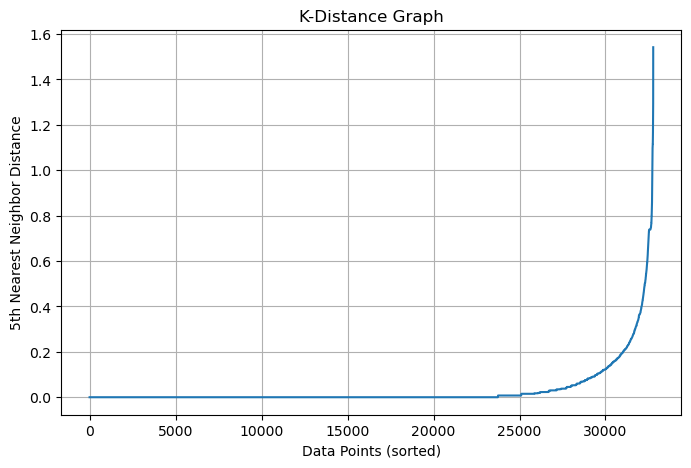

In [70]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# data preparation
attributes = catalog_df[['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5']]
scaler = StandardScaler()
X_train = scaler.fit_transform(attributes)

# nearest neighbors graph
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5)
distances, indices = neigh.fit(X_train).kneighbors(X_train)

# plot k-distance graph
distances = np.sort(distances[:, 4])  # distances to the 4th nearest neighbor
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Data Points (sorted)")
plt.ylabel("5th Nearest Neighbor Distance")
plt.grid(True)
plt.show()

# choose eps value from the graph and apply DBSCAN
dbscan = DBSCAN(eps=0.17, min_samples=5)  # determine eps k distance graph
catalog_df['dbscan_cluster'] = dbscan.fit_predict(X_train)




# see what it looks like


In [71]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_train, catalog_df['dbscan_cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5180448812296397


In [73]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid


# eps aralığını otomatik belirleme (K-Distance Graph yöntemi)
nearest_neighbors = NearestNeighbors(n_neighbors=4)  # min_samples ile aynı olmalı
neighbors = nearest_neighbors.fit(X_train)
distances, indices = neighbors.kneighbors(X_train)
distances = np.sort(distances[:, -1])  # 4. en uzak mesafeler
eps_min = max(distances[int(len(distances) * 0.1)], 0.01)  # 0.01 alt sınır
eps_max = distances[int(len(distances) * 0.9)]
eps_range = (eps_min, eps_max)

# min_samples aralığını otomatik belirleme
min_samples_range = range(2, int(len(X_train) * 0.02))

# Grid Search için parametre aralığını otomatik tanımlama
param_grid = {
    'eps': np.linspace(eps_range[0], eps_range[1], 10),  # eps aralığı
    'min_samples': min_samples_range                    # min_samples aralığı
}

best_score = -1
best_params = None

# Grid Search işlemi
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan.fit_predict(X_train)
    
    # Gürültü ve tek küme kontrolü
    if len(set(labels)) <= 1 or -1 in set(labels):
        continue

        # Silhouette score hesapla
    score = silhouette_score(X_train, labels)
    
    # En iyi sonucu kaydet
    if score > best_score:
        best_score = score
        best_params = params
    

# En iyi sonuçlar
print(f"Best Params: {best_params}")
print(f"Best Silhouette Score: {best_score}")


Best Params: None
Best Silhouette Score: -1


#### DBSCAN (optimized)metrics

In [72]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_train, catalog_df['dbscan_cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5180448812296397


In [59]:
noise_ratio = (catalog_df['dbscan_cluster'] == -1).sum() / len(catalog_df)
print(f"Noise Ratio: {noise_ratio}")


Noise Ratio: 0.05803026604832805


In [60]:
num_clusters = len(set(catalog_df['dbscan_cluster'])) - (1 if -1 in catalog_df['dbscan_cluster'] else 0)
print(f"Number of Clusters: {num_clusters}")


Number of Clusters: 513


In [61]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_train, catalog_df['dbscan_cluster'])
print(f"Davies-Bouldin Score: {db_score}")


Davies-Bouldin Score: 1.0691413341677543


In [62]:
cluster_sizes = catalog_df['dbscan_cluster'].value_counts()
print(cluster_sizes)


dbscan_cluster
 11     2126
-1      1902
 2      1531
 46     1343
 3      1250
        ... 
 405       5
 25        5
 387       5
 334       5
 493       4
Name: count, Length: 513, dtype: int64


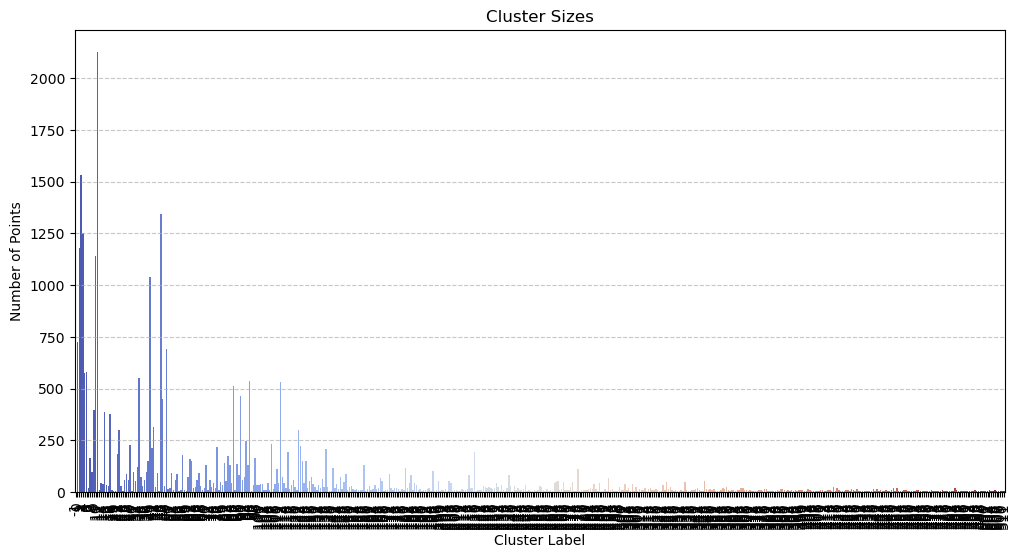

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Küme boyutlarını hesapla
cluster_counts = catalog_df['dbscan_cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Number of Points']

# Küme boyutlarını görselleştir
plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_counts, x='Cluster', y='Number of Points', palette='coolwarm')
plt.title('Cluster Sizes')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



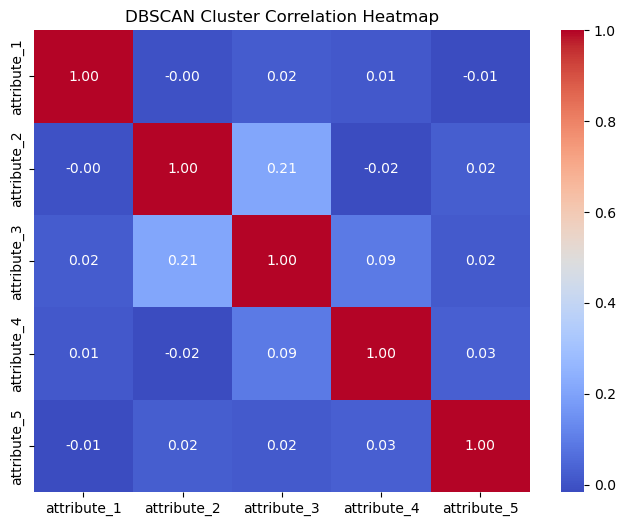

In [ ]:
import seaborn as sns

# Her küme için özelliklerin ortalama değerlerini al
dbscan_cluster_means = catalog_df.groupby('dbscan_cluster')[['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5']].mean()

# Korelasyon matrisini hesapla
correlation_matrix = dbscan_cluster_means.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
dplt.show()

In [65]:
dbscan_cluster_means

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5
dbscan_cluster,,,,,
-1,6.229758,1.291798,290.136172,1.15142,85.887487
0,10.000000,1.000000,511.307163,0.00000,93.714876
1,10.000000,0.000000,506.072095,0.00000,21.198473
2,10.000000,1.000000,511.214892,0.00000,19.229915
3,4.000000,1.000000,483.687200,0.00000,68.539200
...,...,...,...,...,...
507,6.000000,1.000000,515.000000,0.00000,160.000000
508,4.000000,2.000000,108.200000,3.00000,20.000000
509,10.000000,1.000000,394.000000,0.00000,148.800000


In [ ]:
# catalog-transaction connection (by product_id)
dbscan_merged = transactions_df.merge(catalog_df[['product_id', 'dbscan_cluster']], on='product_id', how='left')


# Satın alma gün aralığını yeniden hesapla
dbscan_merged['purchase_date'] = pd.to_datetime(dbscan_merged['purchase_date'])


dbscan_merged_data_unique = dbscan_merged_data.drop_duplicates(subset=['purchase_date', 'KNN_cluster'])


knn_merged_data_unique['week_diff'] = knn_merged_data_unique.groupby('KNN_cluster')['purchase_date'].diff().dt.days / 7

# Aynı gün alınan transactionları dışarıda bırakmak için sadece bir satır olan günleri filtreliyoruz

"""
# Küme bazında ortalama gün aralığını hesapla
knn_merged_data['avg_week_diff'] = knn_merged_data.groupby('KNN_cluster')['week_diff'].transform('mean')
knn_merged_data['avg_week_diff'] = knn_merged_data['avg_week_diff'].apply(lambda x: round(x) if 1 <= round(x) <= 4 and 0 < round(x) < 1  else 0)


knn_merged_data"""
knn_merged_data_unique['week_diff'] = knn_merged_data_unique['week_diff'].apply(
    lambda x: min(max(round(x), 1), 4) if 0 < x <= 4 else 0
)
# 'week_diff' sütunundaki benzersiz değerleri görmek
print(knn_merged_data_unique['week_diff'].unique())

In [665]:
# product_id bazında cluster bilgilerini ekle

# Satın alma gün aralığını yeniden hesapla
dbscan_merge['purchase_date'] = pd.to_datetime(dbscan_merge['purchase_date'])
dbscan_merge['days_since_first_purchase'] = (dbscan_merge['purchase_date'] - dbscan_merge.groupby('product_id')['purchase_date'].transform('min')).dt.days

# Küme bazında ortalama gün aralığını hesapla
dbscan_avg_intervals = dbscan_merge.groupby('dbscan_cluster')['days_since_first_purchase'].mean().reset_index()
dbscan_avg_intervals.rename(columns={'days_since_first_purchase': 'avg_purchase_interval'}, inplace=True)

# Sonuçları birleştir
dbscan_avg_intervals['avg_purchase_interval_weeks'] = dbscan_avg_intervals['avg_purchase_interval'] / 7


dbscan_avg_intervals = dbscan_merge.merge(
    dbscan_avg_intervals[['dbscan_cluster', 'avg_purchase_interval_weeks']],
    on='dbscan_cluster',
    how='left'
)

dbscan_avg_intervals.nunique



<bound method DataFrame.nunique of          customer_id  product_id purchase_date  quantity  year  month  \
0              38769        3477    2020-06-01         1  2020      6   
1              42535       30474    2020-06-01         1  2020      6   
2              42535       15833    2020-06-01         1  2020      6   
3              42535       20131    2020-06-01         1  2020      6   
4              42535        4325    2020-06-01         1  2020      6   
...              ...         ...           ...       ...   ...    ...   
1071533        22114       29567    2021-01-31         2  2021      1   
1071534        22114       21068    2021-01-31         1  2021      1   
1071535        10900       18270    2021-01-31         1  2021      1   
1071536        17894       31265    2021-01-31         5  2021      1   
1071537        25974       17983    2021-01-31         1  2021      1   

         day_of_week  dbscan_cluster  days_since_first_purchase  \
0                  0 

### SPECTRAL CLUSTERING

In [264]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
catalog_df['spectral_cluster'] = spectral.fit_predict(X_train)


In [265]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_train, catalog_df['spectral_cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: -0.20541199094454002


In [269]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_train, catalog_df['spectral_cluster'])
print(f"Davies-Bouldin Score: {db_score}")


Davies-Bouldin Score: 5.401802713990852


In [268]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(X_train, catalog_df['spectral_cluster'])
print(f"Calinski-Harabasz Score: {ch_score}")


Calinski-Harabasz Score: 138.41680664694985


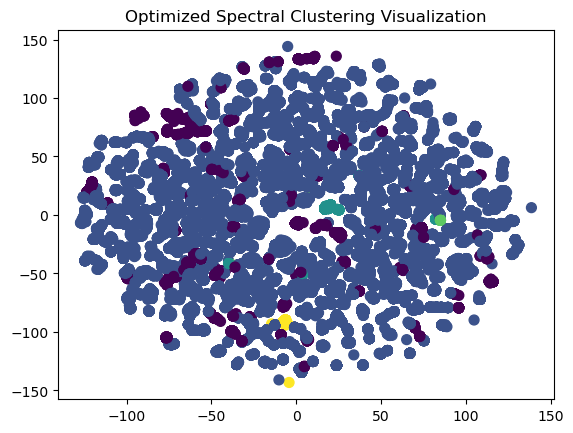

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Dimensionality reduction with T-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_train)

labels = spectral.fit_predict(X_train)
# Plot the clusters
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Optimized Spectral Clustering Visualization')
plt.show()

# WASTE OF TIME ! 11min 30 sec for 5 clusters !

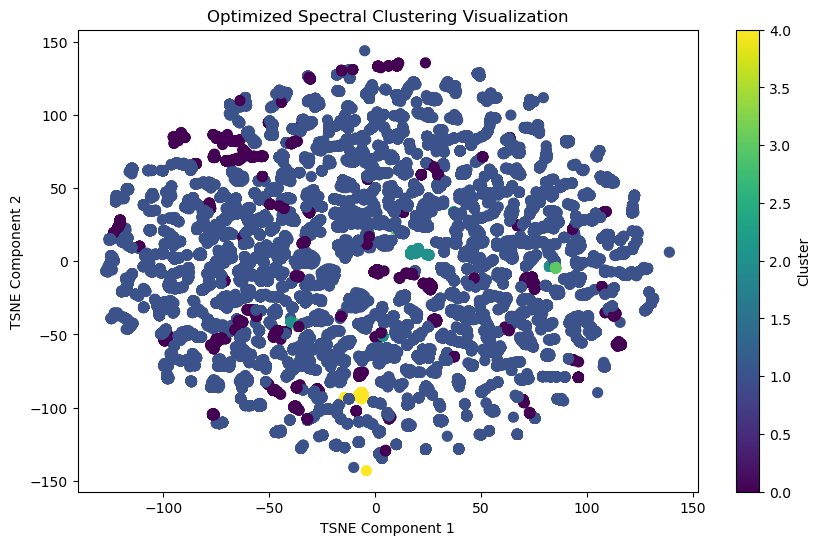

In [272]:
 # T-SNE sonucu görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Optimized Spectral Clustering Visualization')
plt.colorbar(label='Cluster')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

## Feature Engineering by Using Categories


In [304]:
map = category_map_df.copy()

In [312]:
from collections import defaultdict, deque

# Ağaç yapısı için ilişki tablosu oluşturma
hierarchy = defaultdict(list)
reverse_hierarchy = defaultdict(list)
for _, row in map.iterrows():
    hierarchy[row['parent_category_id']].append(row['category_id'])
    reverse_hierarchy[row['category_id']].append(row['parent_category_id'])

# Katman belirleme
def assign_layers(hierarchy, root=0):
    layers = {}
    queue = deque([(root, 1)])  # Başlangıç katmanı (Layer 1)
    visited = set()

    while queue:
        node, layer = queue.popleft()
        if node not in visited:
            visited.add(node)
            layers[node] = layer
            for child in hierarchy[node]:
                queue.append((child, layer + 1))

    return layers

disconnected_categories = category_map[~category_map['parent_category_id'].isin(category_map['category_id']) & category_map['parent_category_id'].notnull()]


potential_roots = set(category_map['parent_category_id']) - set(category_map['category_id'])

# Katmanları hesapla
layer_labels = assign_layers(hierarchy)

# DataFrame'e ekleyelim
map['layer'] = map['category_id'].map(layer_labels)





In [313]:
import pandas as pd
from collections import defaultdict, deque


category_map = category_map_df.copy()

# Building the hierarchy dictionary
hierarchy = defaultdict(list)
for _, row in category_map.iterrows():
    hierarchy[row['parent_category_id']].append(row['category_id'])

# BFS function to assign layers
def assign_layers_bfs(hierarchy):
    layers = {}
    queue = deque([(0, 1)])  # Root node (0), starting at layer 1
    visited = set()

    while queue:
        node, layer = queue.popleft()
        if node not in visited:
            visited.add(node)
            layers[node] = layer
            for child in hierarchy[node]:
                queue.append((child, layer + 1))

    return layers

# Calculating layers using BFS
layer_labels = assign_layers_bfs(hierarchy)

# Adding layers to the original category map
category_map['layer'] = category_map['category_id'].map(layer_labels)

category_map.to_csv("category_map_with_layers.csv", index=False)





feature Eng (add depth information)

In [420]:
import networkx as nx
category_map_df = pd.read_csv('product_category_map.csv')
data = category_map_df.copy()


In [422]:
# Kategori Ağı Oluşturma
graph = nx.DiGraph()
for _, row in data.iterrows():
    graph.add_edge(row['parent_category_id'], row['category_id'])

# Döngü Tespiti ve Kaldırma
try:
    cycles = list(nx.find_cycle(graph, orientation='original'))
    for edge in cycles:
        graph.remove_edge(edge[0], edge[1])
except nx.NetworkXNoCycle:
    pass

# Derinlik Hesaplama Fonksiyonu
def calculate_depth(graph, node, depth, depths):
    depths[node] = depth
    for child in graph.successors(node):  # Çocuk düğümleri dolaş
        calculate_depth(graph, child, depth + 1, depths)

# Kök Düğümü Belirleme ve Derinlik Hesaplama
root_node = 3898  # Kullanıcıdan alınan bilgiye göre kök düğüm
corrected_depths = {}
calculate_depth(graph, root_node, 0, corrected_depths)

# Derinlikleri Veri Çerçevesine Ekleme
data['category_depth'] = data['category_id'].map(corrected_depths)

# Sonuçları Görselleştirme

In [ ]:
# Function to calculate the number of subcategories for each category
def calculate_subcategories(graph):
    subcategory_counts = {}
    for node in graph.nodes:
        # Get all descendants (subcategories) of the node
        subcategories = nx.descendants(graph, node)
        subcategory_counts[node] = len(subcategories)
    return subcategory_counts

# Calculate the number of subcategories for each category
subcategory_counts = calculate_subcategories(graph)

# Add the subcategory count as a new feature in the DataFrame
data['num_subcategories'] = data['category_id'].map(subcategory_counts)

# Display the updated DataFrame with the new feature
data

(      category_id  parent_category_id  category_depth  num_subcategories
 0               0                  75               3                  0
 1               1                1499               4                  0
 2               2                1082               3                  0
 3               3                3498               3                  0
 4               4                1623               3                  0
 ...           ...                 ...             ...                ...
 4327         4295                3898               1                  0
 4328         4296                3898               1                  0
 4329         4297                3898               1                  0
 4330         4298                3898               1                  0
 4331         4299                3898               1                  0
 
 [4332 rows x 4 columns],)

In [428]:
# Step 1: Binary Indicator for Subcategories
data['has_subcategories'] = (data['num_subcategories'] > 0).astype(int)

data

,category_id,parent_category_id,category_depth,num_subcategories,has_subcategories
0,0,75,3,0,0
1,1,1499,4,0,0
2,2,1082,3,0,0
3,3,3498,3,0,0
4,4,1623,3,0,0
...,...,...,...,...,...
4327,4295,3898,1,0,0
4328,4296,3898,1,0,0
4329,4297,3898,1,0,0
4330,4298,3898,1,0,0


In [430]:
# Step 2: Subcategory Density
# Avoid division by zero by setting density to NaN for depth 0 nodes
data['subcategory_density'] = data.apply(
    lambda row: row['num_subcategories'] / row['category_depth'] if row['category_depth'] > 0 else None, axis=1
)

data


,category_id,parent_category_id,category_depth,num_subcategories,has_subcategories,subcategory_density
0,0,75,3,0,0,0.0
1,1,1499,4,0,0,0.0
2,2,1082,3,0,0,0.0
3,3,3498,3,0,0,0.0
4,4,1623,3,0,0,0.0
...,...,...,...,...,...,...
4327,4295,3898,1,0,0,0.0
4328,4296,3898,1,0,0,0.0
4329,4297,3898,1,0,0,0.0
4330,4298,3898,1,0,0,0.0


In [432]:
# Step 3: Categorical Buckets for Subcategories
def categorize_subcategories(num_subcategories):
    if num_subcategories == 0:
        return "Leaf"
    elif 1 <= num_subcategories <= 5:
        return "Small Group"
    else:
        return "Large Group"

data['subcategory_bucket'] = data['num_subcategories'].apply(categorize_subcategories)

data

,category_id,parent_category_id,category_depth,num_subcategories,has_subcategories,subcategory_density,subcategory_bucket
0,0,75,3,0,0,0.0,Leaf
1,1,1499,4,0,0,0.0,Leaf
2,2,1082,3,0,0,0.0,Leaf
3,3,3498,3,0,0,0.0,Leaf
4,4,1623,3,0,0,0.0,Leaf
...,...,...,...,...,...,...,...
4327,4295,3898,1,0,0,0.0,Leaf
4328,4296,3898,1,0,0,0.0,Leaf
4329,4297,3898,1,0,0,0.0,Leaf
4330,4298,3898,1,0,0,0.0,Leaf


In [435]:
# Step 4: Relative Importance in the Hierarchy
# Normalize the number of subcategories by the maximum value in the dataset
max_subcategories = data['num_subcategories'].max()
data['hierarchical_importance'] = data['num_subcategories'] / max_subcategories if max_subcategories > 0 else 0
data


,category_id,parent_category_id,category_depth,num_subcategories,has_subcategories,subcategory_density,subcategory_bucket,hierarchical_importance
0,0,75,3,0,0,0.0,Leaf,0.0
1,1,1499,4,0,0,0.0,Leaf,0.0
2,2,1082,3,0,0,0.0,Leaf,0.0
3,3,3498,3,0,0,0.0,Leaf,0.0
4,4,1623,3,0,0,0.0,Leaf,0.0
...,...,...,...,...,...,...,...,...
4327,4295,3898,1,0,0,0.0,Leaf,0.0
4328,4296,3898,1,0,0,0.0,Leaf,0.0
4329,4297,3898,1,0,0,0.0,Leaf,0.0
4330,4298,3898,1,0,0,0.0,Leaf,0.0


In [437]:
# Step 5: Cumulative Subcategories
# Add parent's subcategories to calculate cumulative subcategory count
parent_subcategories = data.set_index('category_id')['num_subcategories'].to_dict()

def calculate_cumulative_subcategories(row, parent_dict):
    parent_id = row['parent_category_id']
    parent_count = parent_dict.get(parent_id, 0)  # Default to 0 if no parent
    return row['num_subcategories'] + parent_count

data['cumulative_subcategories'] = data.apply(
    lambda row: calculate_cumulative_subcategories(row, parent_subcategories), axis=1
)

data

,category_id,parent_category_id,category_depth,num_subcategories,has_subcategories,subcategory_density,subcategory_bucket,hierarchical_importance,cumulative_subcategories
0,0,75,3,0,0,0.0,Leaf,0.0,7
1,1,1499,4,0,0,0.0,Leaf,0.0,4
2,2,1082,3,0,0,0.0,Leaf,0.0,6
3,3,3498,3,0,0,0.0,Leaf,0.0,15
4,4,1623,3,0,0,0.0,Leaf,0.0,21
...,...,...,...,...,...,...,...,...,...
4327,4295,3898,1,0,0,0.0,Leaf,0.0,4299
4328,4296,3898,1,0,0,0.0,Leaf,0.0,4299
4329,4297,3898,1,0,0,0.0,Leaf,0.0,4299
4330,4298,3898,1,0,0,0.0,Leaf,0.0,4299


In [ ]:
product_catalog_new = pd.read_csv("product_catalog.csv")

# Convert to DataFrame
adjusted_product_catalog = pd.DataFrame(product_catalog_new)


# Ensure categories are expanded without dropping the original column
adjusted_product_catalog['categories'] = adjusted_product_catalog['categories'].apply(
    lambda x: eval(x) if isinstance(x, str) and x.startswith('[') else x
)

# Expand categories into separate columns
max_categories = adjusted_product_catalog['categories'].apply(lambda x: len(x) if isinstance(x, list) else 0).max()
for i in range(max_categories):
    adjusted_product_catalog[f'category_id_{i+1}'] = adjusted_product_catalog['categories'].apply(
        lambda x: x[i] if isinstance(x, list) and i < len(x) else None
    )

# Drop the original categories column as it has been expanded
#adjusted_product_catalog = adjusted_product_catalog.drop(columns=['categories'])

# Display the expanded DataFrame
adjusted_product_catalog




,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,category_id_1,category_id_2,...,category_id_26,category_id_27,category_id_28,category_id_29,category_id_30,category_id_31,category_id_32,category_id_33,category_id_34,category_id_35
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]",2890.0,855.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28640,1366,10,1,537,0,101,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3...",3270.0,163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21399,1090,10,1,511,0,0,[3270],3270.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8504,768,4,1,484,0,66,[2470],2470.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32771,12036,1383,10,0,503,0,101,"[3502, 1088, 2004, 691, 3422, 2308, 308, 3688,...",3502.0,1088.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32772,22709,567,4,2,491,3,66,"[3900, 3905, 3903, 3910, 1807, 274, 1467, 914]",3900.0,3905.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32773,32322,1385,10,1,500,0,37,"[2686, 2609, 725]",2686.0,2609.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32774,19118,1113,6,2,491,0,117,"[3900, 3910, 3903, 2473, 914, 274]",3900.0,3910.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [464]:
#Aggregate Attributes by Category

# Melt the DataFrame to create a long-format DataFrame where each row is a product-category pair
melted_catalog = adjusted_product_catalog.melt(
    id_vars=['product_id', 'manufacturer_id', 'attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5'],
    value_vars=[f'category_id_{i+1}' for i in range(max_categories)],
    var_name='category_column',
    value_name='category_id'
).dropna(subset=['category_id'])

# Ensure category_id is treated as integer
melted_catalog['category_id'] = melted_catalog['category_id'].astype(int)

# Aggregate attributes by category_id
aggregated_attributes = melted_catalog.groupby('category_id').agg({
    'attribute_1': ['mean', 'median', 'var'],
    'attribute_2': ['mean', 'median', 'var'],
    'attribute_3': ['mean', 'median', 'var'],
    'attribute_4': ['mean', 'median', 'var'],
    'attribute_5': ['mean', 'median', 'var']
}).reset_index()

# Rename columns for clarity
aggregated_attributes.columns = ['category_id'] + [
    f"{attr}_{stat}" for attr in ['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5']
    for stat in ['mean', 'median', 'var']
]
aggregated_attributes

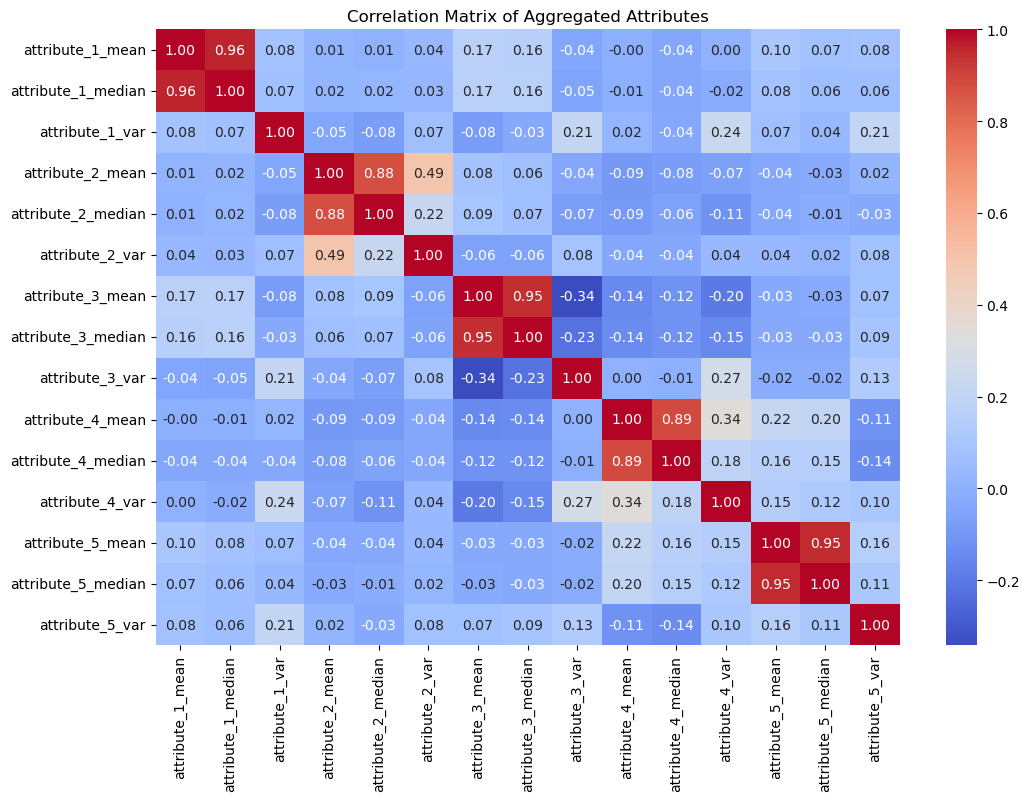

In [466]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for aggregated attributes
correlation_matrix = aggregated_attributes.iloc[:, 1:].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Aggregated Attributes")
plt.show()

In [471]:
aggregated_attributes

,category_id,attribute_1_mean,attribute_1_median,attribute_1_var,attribute_2_mean,attribute_2_median,attribute_2_var,attribute_3_mean,attribute_3_median,attribute_3_var,attribute_4_mean,attribute_4_median,attribute_4_var,attribute_5_mean,attribute_5_median,attribute_5_var
0,0,10.0,10.0,0.000000,0.500000,0.5,0.500000,503.000000,503.0,0.000000,3.00,3.0,0.000000,185.000000,185.0,2.000000
1,1,4.0,4.0,0.000000,1.250000,1.0,0.250000,471.000000,474.0,36.000000,0.00,0.0,0.000000,-1.000000,-1.0,0.000000
2,2,5.7,4.0,10.233333,0.600000,0.0,1.600000,417.800000,403.0,5745.066667,1.50,1.5,2.500000,82.500000,86.5,2558.722222
3,3,10.0,10.0,0.000000,1.000000,0.0,3.000000,505.000000,505.0,0.000000,0.00,0.0,0.000000,131.000000,126.0,2469.000000
4,4,4.0,4.0,0.000000,0.250000,0.0,0.500000,453.250000,453.0,0.500000,0.25,0.0,1.357143,108.000000,108.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,4293,6.0,6.0,0.000000,0.666667,1.0,0.333333,525.666667,537.0,385.333333,0.00,0.0,0.000000,96.333333,122.0,1976.333333
3356,4294,6.0,6.0,NaN,1.000000,1.0,NaN,294.000000,294.0,NaN,0.00,0.0,NaN,146.000000,146.0,NaN
3357,4296,10.0,10.0,NaN,0.000000,0.0,NaN,503.000000,503.0,NaN,0.00,0.0,NaN,132.000000,132.0,NaN
3358,4298,6.0,6.0,0.000000,0.500000,0.5,0.500000,537.000000,537.0,0.000000,0.00,0.0,0.000000,122.000000,122.0,0.000000


In [473]:
# Assume hierarchical features (e.g., category_depth, cumulative_subcategories) are in a separate DataFrame
# Merge hierarchical features into the aggregated attributes DataFrame
hierarchical_features = product_catalog[['category_id', 'category_depth', 'cumulative_subcategories']].drop_duplicates()

# Merge category-related features with aggregated attributes
merged_features = pd.merge(
    aggregated_attributes, hierarchical_features, on='category_id', how='inner'
)

# Drop category_id for clustering and handle missing values
merged_features_no_id = merged_features.drop(columns=['category_id']).fillna(0)

# Scale the combined features
scaled_combined_features = scaler.fit_transform(merged_features_no_id)

# Convert back to DataFrame for easy interpretation
scaled_combined_features_df = pd.DataFrame(
    scaled_combined_features, columns=merged_features_no_id.columns
)

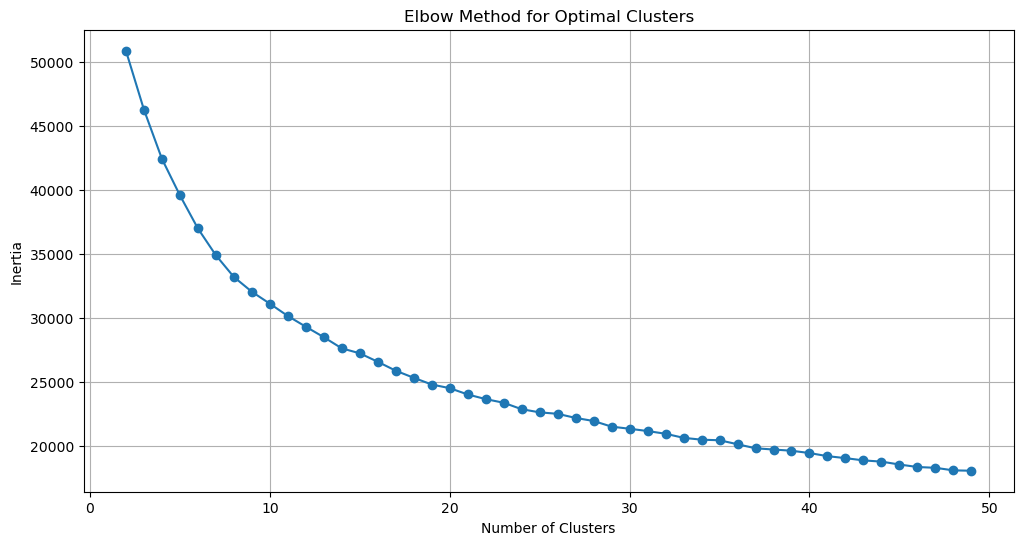

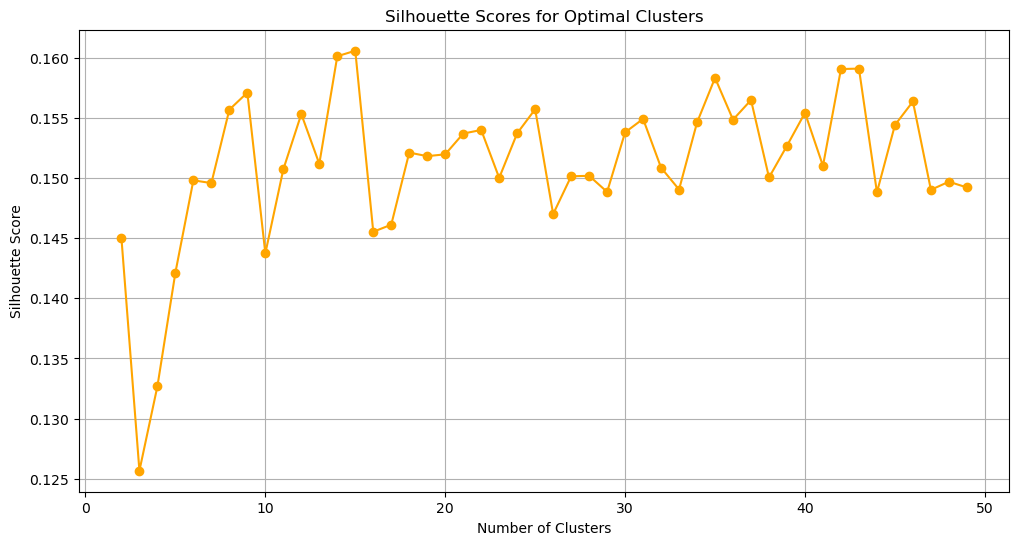

In [475]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 50)  # Testing for 2 to 10 clusters

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_combined_features)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to cluster centers
    silhouette_scores.append(silhouette_score(scaled_combined_features, kmeans.labels_))

# Plot the Elbow Method results
plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()


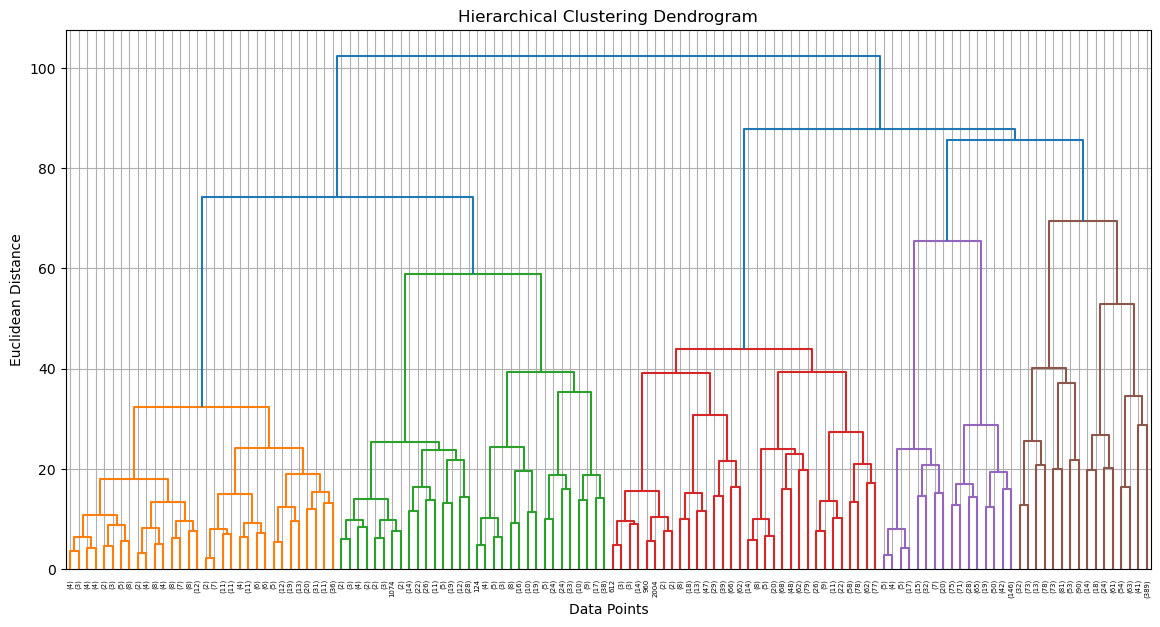

In [479]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Perform hierarchical clustering using Ward's method
linked = linkage(scaled_combined_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(14, 7))
dendrogram(linked, truncate_mode='level', p=6)  # Truncate to show first 5 levels
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid()
plt.show()

# Suggest clusters based on a distance threshold or cluster count
optimal_clusters_hierarchical = 10  # Example: You can adjust this value based on dendrogram
hierarchical_labels = fcluster(linked, t=optimal_clusters_hierarchical, criterion='maxclust')

# Add the hierarchical labels to the combined dataset for further analysis
scaled_combined_features_df['hierarchical_cluster'] = hierarchical_labels

# Display the dataset with hierarchical cluster labels


In [481]:
scaled_combined_features_df.to_csv("scaled_combined_features.csv", index=False)